IMPORTING NECESSARY PACKAGES AND MODULES

In [4]:
import pandas as pd
from data_preprocess import *
from k_fold_methods import *
from evaluation import *
from data_exploration import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


READING THE CSV FILE

In [5]:
df = pd.read_csv("../../../datasets/winequality.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False


PREPROCESSING RECOMMEND ATTRIBUTE (TRUE-1,FALSE-0) CHANGING TO NUMERICAL FROM CATEGORICAL 

In [6]:
process_binary(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


features-LIST WITH DEPENDENT VARIABLES target1-target variable

In [7]:
features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH','sulphates','alcohol']
target1 = ['recommend']

SEPARATING THE DEPENDENT AND INDEPENDENT VARIABLES

In [8]:
x = df[features]
y1 = df[target1].values.ravel()

# different cross-validations with KNN model 

# k-fold cross validation 

this function does following things:

1-k-fold cross validation of dataset by traineing model on k-1 folds with one fold held back for testing.

2-applying KNN model with parameters as no. of neighbours is 30 and weighing criteria is distance obtained from the hyper paramteter tuning in notebook #issue-3_train_test_split.ipynb.

3- main aim is doing k- fold validation and evaluating accuracy through mean_score thus we can be sure that our model is stable or not over fitted on training data. 

4-this highlights the importance of choosing k-fold value for good accuracy score of our model. 

result obtained:

the accuracy is highest with i.e. 78.05 % with 20 no. of folds. 

In [9]:
 model = KNeighborsClassifier(n_neighbors=30, weights="distance")
df1 = k_fold_table(model,x,y1)
df1

,number of folds,accuracy(mean_score(%))
0,2.0,77.358105
1,3.0,76.745092
2,4.0,76.948713
3,5.0,76.928248
4,6.0,77.153908
5,7.0,77.317129
6,8.0,77.215045
7,9.0,77.439550
8,10.0,77.828471
9,11.0,77.786567


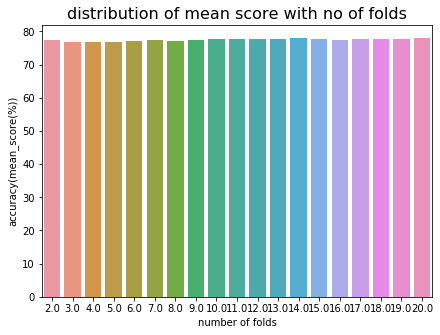

In [10]:
graph(df1,'number of folds','accuracy(mean_score(%))','distribution of mean score with no of folds')

# stratified k-fold cross validation

now we will use stratified k-fold cross validation in which each set containing approximately the same ratio of target labels as the complete data.this will avoid data imbalance and improve overall accuracy.

results obtained:

1- low value of k is biased so values upto 20 are analysed.

2- we observe that mean_score increases with increasi in fold value.

3-highest accuracy obtained is 78.35 with 20-fold stratified cross-validation.

In [11]:
df2 = stratified_k_fold_table(model,x,y1)
df2

,number of folds,accuracy(mean_score(%))
0,2.0,77.051858
1,3.0,76.806261
2,4.0,77.480342
3,5.0,77.255342
4,6.0,77.785604
5,7.0,77.663780
6,8.0,77.499728
7,9.0,77.622927
8,10.0,77.867785
9,11.0,77.928309


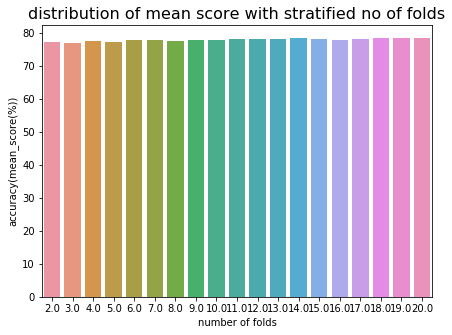

In [12]:
graph(df2,'number of folds','accuracy(mean_score(%))','distribution of mean score with stratified no of folds')

# leave one out cross validation

another potential performance estimator is LeaveOneOut (LOO) cross-validation. ti takes following assumption criteira for evaluation:

1-each learning set is created by taking all the samples except one, the test set being the sample left out.

2-LOO is more computationally expensive than k-fold cross validation but often results in high variance as an estimator for the test error.

3-This cross-validation procedure does not waste much data as only one sample is removed from the training set.

results obtained are:

mean accuracy of 86.81% which is highest for KNN model among different cross-validation methods.


In [13]:
df3 = leave_one_out_table(model,x,y1)
df3

86.81094324213964

# different cross validation using decision tree model

the model is applied with the hypertuned parameters obtained in task#2_wine_quality notebook.

1-max depth is 6 

2-min_samples_leaf are 2

3-used impurity criteria is gini.

In [14]:
model = DecisionTreeClassifier(
        criterion="gini",
        splitter="random",
        random_state=42,
        max_depth=6,
        min_samples_leaf=2,
    )

# k-fold cross validation

result obtained:

1-20 fold cross-validation is used.

2-the highest mean accuracy obtained is 79.64% at 14th fold. 

In [15]:
df4 = k_fold_table(model,x,y1)
df4

,number of folds,accuracy(mean_score(%))
0,2.0,77.603103
1,3.0,78.562489
2,4.0,79.093087
3,5.0,78.766588
4,6.0,78.501822
5,7.0,78.174652
6,8.0,78.113538
7,9.0,79.093999
8,10.0,78.624890
9,11.0,78.787818


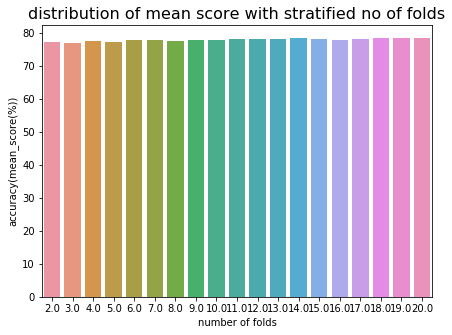

In [12]:
graph(df4,'number of folds','accuracy(mean_score(%))','distribution of mean score with k no. of folds')

# stratified k-fold cross validation

result obtained:

1-20 fold cross-validation is used.

2-the highest mean accuracy obtained id 79.82% at 15th fold slightly higher than k-fold. 

In [16]:
df5 = stratified_k_fold_table(model,x,y1)
df5

,number of folds,accuracy(mean_score(%))
0,2.0,76.357697
1,3.0,78.644471
2,4.0,78.011221
3,5.0,77.194180
4,6.0,78.867797
5,7.0,78.970867
6,8.0,78.846834
7,9.0,77.969286
8,10.0,79.420016
9,11.0,78.481042


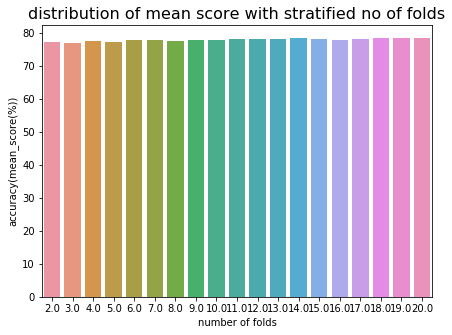

In [12]:
graph(df5,'number of folds','accuracy(mean_score(%))','distribution of mean score with stratified k no. of folds')

# leave one out cross validation

results obtained are:

1-mean accuracy of 81.70% which is highest for decision tree model among different cross-validation methods.

2-the accuracy is lower than that obtained from KNN model application on wine quality dataset.


In [17]:
df6 = leave_one_out_table(model,x,y1)
df6

81.70681910984075